     Country Name Country Code                          Parameters  Year  \
5   United States          USA  Current account balance (% of GDP)  1972   
6  United Kingdom          GBR  Current account balance (% of GDP)  1972   
7           Italy          ITA  Current account balance (% of GDP)  1972   
8          Canada          CAN  Current account balance (% of GDP)  1972   
9           Japan          JPN  Current account balance (% of GDP)  1972   

   Value Country Group  
5  -0.41            G7  
6   0.31            G7  
7    1.4            G7  
8   -2.1            G7  
9    2.8            G7  
         Country Name Country Code                          Parameters  Year  \
0               India          IND  Current account balance (% of GDP)  1972   
1  Russian Federation          RUS  Current account balance (% of GDP)  1972   
2               China          CHN  Current account balance (% of GDP)  1972   
3        South Africa          ZAF  Current account balance (% of GDP)  1

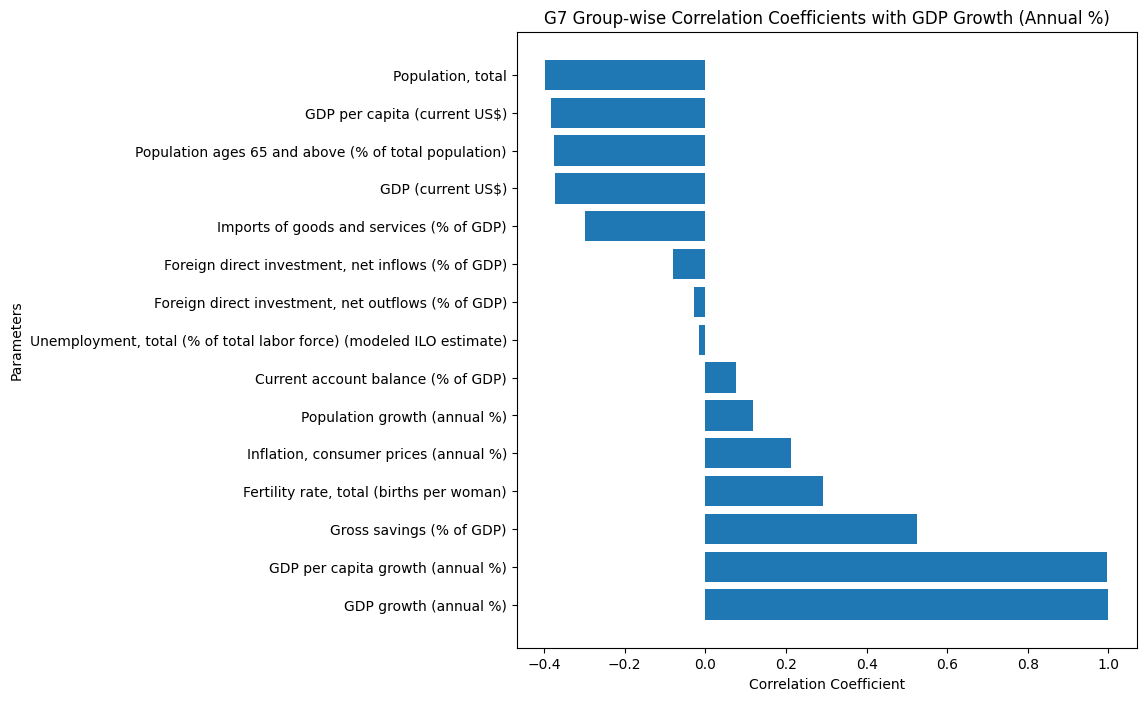

Parameters
GDP growth (annual %)                                                      1
GDP per capita growth (annual %)                                        0.97
Gross savings (% of GDP)                                                0.44
Foreign direct investment, net inflows (% of GDP)                       0.42
Foreign direct investment, net outflows (% of GDP)                      0.37
Current account balance (% of GDP)                                      0.26
Imports of goods and services (% of GDP)                                0.24
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.054
Fertility rate, total (births per woman)                              -0.016
Population, total                                                     -0.017
GDP per capita (current US$)                                          -0.021
Population ages 65 and above (% of total population)                  -0.069
Population growth (annual %)                                     

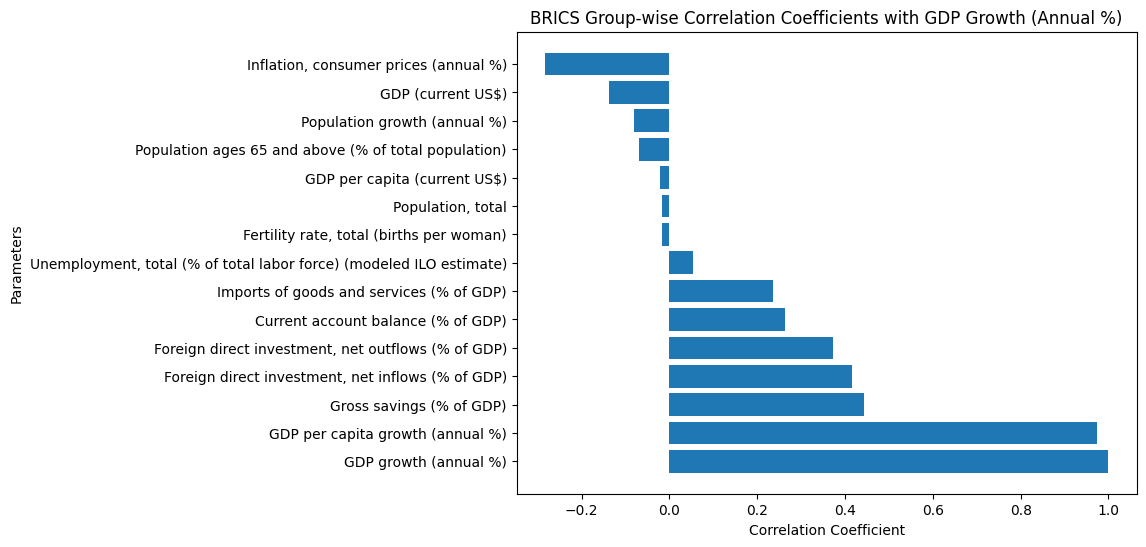

Parameters
Imports of goods and services (% of GDP)                                 0.4
Gross savings (% of GDP)                                                0.38
GDP per capita growth (annual %)                                        0.33
GDP growth (annual %)                                                   0.25
Inflation, consumer prices (annual %)                                   0.19
Population ages 65 and above (% of total population)                    0.18
GDP per capita (current US$)                                            0.15
GDP (current US$)                                                        0.1
Population growth (annual %)                                           0.021
Unemployment, total (% of total labor force) (modeled ILO estimate)   -0.093
Population, total                                                      -0.12
Current account balance (% of GDP)                                       NaN
Fertility rate, total (births per woman)                         

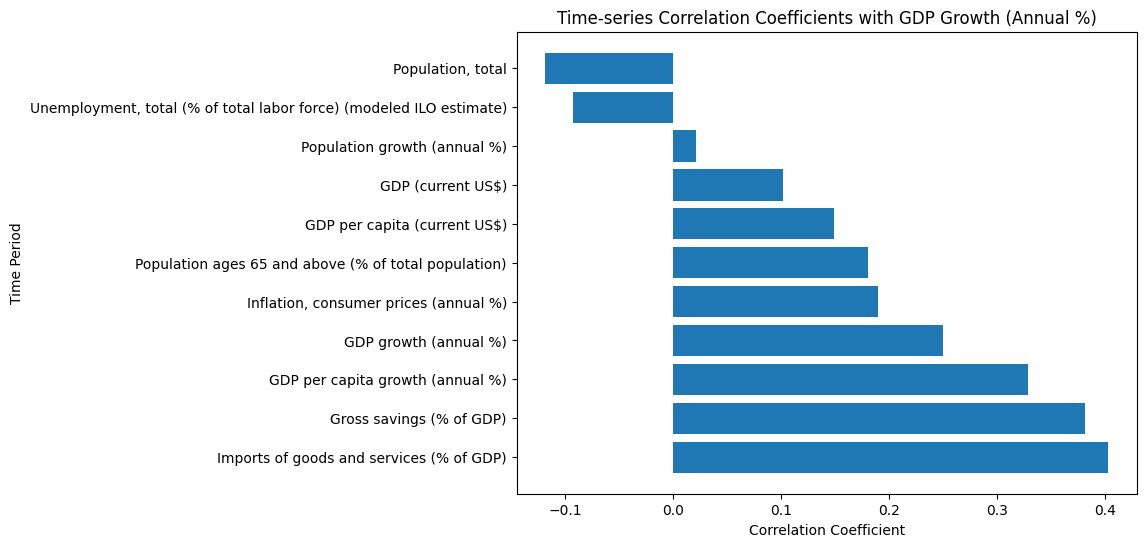

Best model for G7: SVR
Best model for BRICS: Linear Regression
Predicted average GDP growth (annual %) for G7 from 2023 to 2030:
[[4.79772428]
 [4.77088027]
 [4.74222381]
 [4.71394523]
 [4.6883373 ]
 [4.6675928 ]
 [4.6536232 ]
 [4.6479145 ]]
Predicted average GDP growth (annual %) for BRICS from 2023 to 2030:
[[6.57415228]
 [6.60456335]
 [6.63497442]
 [6.66538549]
 [6.69579656]
 [6.72620763]
 [6.7566187 ]
 [6.78702977]]
   Year  G7  BRICS
0  2023 4.8    6.6
1  2024 4.8    6.6
2  2025 4.7    6.6
3  2026 4.7    6.7
4  2027 4.7    6.7
5  2028 4.7    6.7
6  2029 4.7    6.8
7  2030 4.6    6.8
G7 Outliers:
      Country Name Country Code                             Parameters  Year  \
0            Japan          JPN       GDP per capita growth (annual %)  1972   
1           Canada          CAN       GDP per capita growth (annual %)  1982   
2           Canada          CAN       GDP per capita growth (annual %)  1991   
3    United States          USA       GDP per capita growth (annual %)  

C:\Users\Saurav Sahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\Saurav Sahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\Saurav Sahu\AppData\Local\Temp\ipykernel_132\3037253391.py:274: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



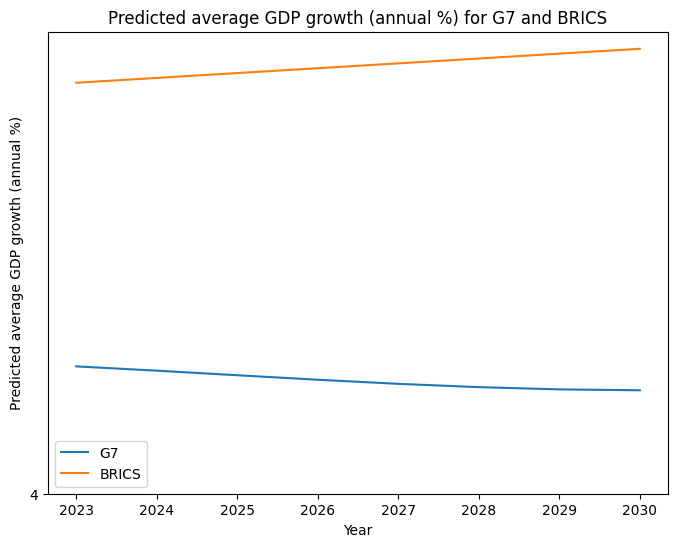

+----+--------+---------+---------+
|    |   Year |      G7 |   BRICS |
|----+--------+---------+---------|
|  0 |   2023 | 4.79772 | 6.57415 |
|  1 |   2024 | 4.77088 | 6.60456 |
|  2 |   2025 | 4.74222 | 6.63497 |
|  3 |   2026 | 4.71395 | 6.66539 |
|  4 |   2027 | 4.68834 | 6.6958  |
|  5 |   2028 | 4.66759 | 6.72621 |
|  6 |   2029 | 4.65362 | 6.75662 |
|  7 |   2030 | 4.64791 | 6.78703 |
+----+--------+---------+---------+
Summary of the results:
+----------------------+-------------------+
| Category             | Model             |
|----------------------+-------------------|
| Best model for G7    | SVR               |
| Best model for BRICS | Linear Regression |
+----------------------+-------------------+
+------------------------------------------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+
| Category                                                         |    2023 |    2024 |    2025 |    2026 |    2027 |    202

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('New GB.csv')
df

df.isna()

df.dtypes

for col in range(1972, 2023):
    df[str(col)] = pd.to_numeric(df[str(col)], errors='coerce')

# Select the columns from 1972 to 2022
cols = [str(i) for i in range(1972, 2023)]

# Define a function to calculate the mean of non-null values in each row
def fill_with_row_mean(row):
    non_null_values = row[cols][~row[cols].isnull()]
    if len(non_null_values) > 0:
        return round(non_null_values.mean(), 2)
    else:
        return 0.00  # or some other default value

# Apply the function to fill null values
df[cols] = df[cols].apply(lambda x: x.fillna(df.apply(fill_with_row_mean, axis=1)), axis=0)

# Format the columns to display two decimal places without scientific notation
pd.options.display.float_format = '{:.2g}'.format

df.head(5)

# Select the columns from 1972 to 2022
cols = [str(i) for i in range(1972, 2023)]

# Group by country and get the min and max values for each categorical column
country_ranges = df.groupby('Parameters')[cols].agg(['min', 'max'])

pd.set_option('display.max_columns', None)


# Print the results
country_ranges

# Melt the dataset
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code','Parameters'], var_name='Year', value_name='Value')
df_melted

g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']

df_melted['Country Group'] = df_melted['Country Name'].apply(lambda x: 'G7' if x in g7_countries else 'BRICS')
df_melted

df_melted.to_csv('df_melted.csv', index=False)
df_melted.dtypes

# Create a new dataset for G7 group
g7_df = df_melted[df_melted['Country Group'] == 'G7']
print(g7_df.head(5))

# Create a new dataset for BRICS group
brics_df = df_melted[df_melted['Country Group'] == 'BRICS']
print(brics_df.head(5))

# Calculate group-wise correlation between GDP growth (annual %) and other parameters
g7_corr_matrix = df_melted[df_melted['Country Group'] == 'G7'].pivot_table(index='Year', columns='Parameters', values='Value').corr()
print(g7_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))

# Create a figure and axis object for the G7 group-wise correlation
fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.barh(g7_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).index, 
         g7_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).values)
ax2.set_title('G7 Group-wise Correlation Coefficients with GDP Growth (Annual %)')
ax2.set_xlabel('Correlation Coefficient')
ax2.set_ylabel('Parameters')
plt.show()

brics_corr_matrix = df_melted[df_melted['Country Group'] == 'BRICS'].pivot_table(index='Year', columns='Parameters', values='Value').corr()
print(brics_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))

# Create a figure and axis object for the BRICS group-wise correlation
fig3, ax3 = plt.subplots(figsize=(8, 6))
ax3.barh(brics_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).index, 
         brics_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).values)
ax3.set_title('BRICS Group-wise Correlation Coefficients with GDP Growth (Annual %)')
ax3.set_xlabel('Correlation Coefficient')
ax3.set_ylabel('Parameters')
plt.show()

# Calculate time-series correlation between GDP growth (annual %) and other parameters
ts_corr_matrix = df_melted.pivot_table(index='Year', columns='Parameters', values='Value').corr().rolling(window=5).mean()
print(ts_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False))

# Create a figure and axis object for the time-series correlation
fig4, ax4 = plt.subplots(figsize=(8, 6))
ax4.barh(ts_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).index, 
         ts_corr_matrix['GDP growth (annual %)'].sort_values(ascending=False).values)
ax4.set_title('Time-series Correlation Coefficients with GDP Growth (Annual %)')
ax4.set_xlabel('Correlation Coefficient')
ax4.set_ylabel('Time Period')
plt.show()

df_melted['Parameters'].unique()

# Define the parameters that influence the GDP growth (annual %) for each group
g7_influencing_params =   [  'GDP per capita growth (annual %)',     
                             'Fertility rate, total (births per woman)',
                             'Gross savings (% of GDP)',                             
                             'Inflation, consumer prices (annual %)',
                             'Population growth (annual %)' ]

brics_influencing_params =  ['GDP per capita growth (annual %)',       
                             'Imports of goods and services (% of GDP)',
                             'Inflation, consumer prices (annual %)',
                             'Foreign direct investment, net outflows (% of GDP)',
                             'Current account balance (% of GDP)']
                             
       

def prepare_data(df_melted, influencing_params):
    # Filter the data to only consider the specified parameters
    df_melted = df_melted[df_melted['Parameters'].isin(influencing_params)]
    
    # Initialize an empty list to store outliers
    outliers = []
    
    # Iterate over each unique parameter
    for param in df_melted['Parameters'].unique():
        # Filter the data for the current parameter
        param_df = df_melted[df_melted['Parameters'] == param]
        
        # Calculate the Q1 and Q3 for the current parameter
        Q1 = param_df['Value'].quantile(0.25)
        Q3 = param_df['Value'].quantile(0.75)
        
        # Calculate the IQR for the current parameter
        IQR = Q3 - Q1
        
        # Identify outliers for the current parameter
        param_outliers = param_df[(param_df['Value'] < Q1 - 1.5 * IQR) | (param_df['Value'] > Q3 + 1.5 * IQR)]
        
        # Append the outliers to the list
        outliers.append(param_outliers)
    
    # Concatenate the outliers into a single DataFrame
    outliers_df = pd.concat(outliers, ignore_index=True)
    
    # Remove outliers from the original DataFrame
    df_melted = pd.concat([df_melted, outliers_df]).drop_duplicates(keep=False)
    
    # Prepare the data for training
    X = df_melted[['Year']]
    y = df_melted['Value']
    
    # Scale the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled.ravel(), test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, scaler_X, scaler_y, outliers_df


def train_model(X_train, y_train):
    models = {
        'Random Forest': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }
    
    hyperparameters = {
        'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]},
        'Linear Regression': {'fit_intercept': [True, False]},
        'Decision Tree': {'max_depth': [None, 5, 10]},
        'SVR': {'C': [1, 10, 100], 'epsilon': [0.1, 0.5, 1]},
        'KNN': {'n_neighbors': [3, 5, 10]}
    }
    
    results = {}
    for name, model in models.items():
        grid_search = GridSearchCV(model, hyperparameters[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        results[name] = grid_search.best_estimator_
    return results

g7_X_train, g7_X_test, g7_y_train, g7_y_test, g7_scaler_X, g7_scaler_y, g7_outliers_df = prepare_data(g7_df, g7_influencing_params)
g7_models = train_model(g7_X_train, g7_y_train)

brics_X_train, brics_X_test, brics_y_train, brics_y_test, brics_scaler_X, brics_scaler_y, brics_outliers_df = prepare_data(brics_df, brics_influencing_params)
brics_models = train_model(brics_X_train, brics_y_train)

g7_results = {}
for name, model in g7_models.items():
    y_pred = model.predict(g7_X_test)
    g7_results[name] = mean_squared_error(g7_y_test, y_pred)

brics_results = {}
for name, model in brics_models.items():
    y_pred = model.predict(brics_X_test)
    brics_results[name] = mean_squared_error(brics_y_test, y_pred)

g7_best_model = min(g7_results, key=g7_results.get)
brics_best_model = min(brics_results, key=brics_results.get)

print("Best model for G7:", g7_best_model)
print("Best model for BRICS:", brics_best_model)

# Use the best models to make predictions for the years 2023 to 2030
years = np.arange(2023, 2031).reshape(-1, 1)

# Scale the years
g7_years_scaled = g7_scaler_X.transform(years)
brics_years_scaled = brics_scaler_X.transform(years)

g7_best_model_instance = g7_models[g7_best_model]
g7_pred_scaled = g7_best_model_instance.predict(g7_years_scaled)

brics_best_model_instance = brics_models[brics_best_model]
brics_pred_scaled = brics_best_model_instance.predict(brics_years_scaled)

# Convert the predictions back to the original units
g7_pred = g7_scaler_y.inverse_transform(g7_pred_scaled.reshape(-1, 1))
brics_pred = brics_scaler_y.inverse_transform(brics_pred_scaled.reshape(-1, 1))

# Print the predicted values
print("Predicted average GDP growth (annual %) for G7 from 2023 to 2030:")
print(g7_pred)
print("Predicted average GDP growth (annual %) for BRICS from 2023 to 2030:")
print(brics_pred)

# Create a table to display the predicted values
table = pd.DataFrame({'Year': years.flatten(), 'G7': g7_pred.flatten(), 'BRICS': brics_pred.flatten()})
print(table)

# Print the outliers
print("G7 Outliers:")
print(g7_outliers_df)
print("BRICS Outliers:")
print(brics_outliers_df)

# Save the outliers to CSV files
g7_outliers_df.to_csv('g7_outliers.csv', index=False)
brics_outliers_df.to_csv('brics_outliers.csv', index=False)

# Save the predicted values to CSV files
table.to_csv('predicted_values.csv', index=False)

# Plot the predicted values
plt.figure(figsize=(8,6))
plt.plot(years, g7_pred, label='G7')
plt.plot(years, brics_pred, label='BRICS')
plt.xlabel('Year')
plt.ylabel('Predicted average GDP growth (annual %)')
plt.title('Predicted average GDP growth (annual %) for G7 and BRICS')
plt.yticks(range(int(min(min(g7_pred), min(brics_pred))), int(max(max(g7_pred), max(brics_pred))) + 1, 10))
plt.legend()
plt.show()

# Create a table to display the predicted values
table = pd.DataFrame({'Year': years.flatten(), 'G7': g7_pred.flatten(), 'BRICS': brics_pred.flatten()})
print(tabulate(table, headers='keys', tablefmt='psql'))

# Print the summary of the results
print("Summary of the results:")
print(tabulate([["Best model for G7", g7_best_model], ["Best model for BRICS", brics_best_model]], headers=['Category', 'Model'], tablefmt='psql'))
print(tabulate([["Predicted average GDP growth (annual %) for G7 from 2023 to 2030"] + list(g7_pred)], headers=['Category'] + list(years.flatten()), tablefmt='psql'))
print(tabulate([["Predicted average GDP growth (annual %) for BRICS from 2023 to 2030"] + list(brics_pred)], headers=['Category'] + list(years.flatten()), tablefmt='psql'))

In [1]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import dash_bootstrap_components as dbc

# Load the dataset
df = pd.read_csv('New GB.csv')  # Replace with your actual data file

# Convert columns from 1972 to 2022 to numeric
for col in range(1972, 2023):
    df[str(col)] = pd.to_numeric(df[str(col)], errors='coerce')

# Melt the dataset
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Parameters'], var_name='Year', value_name='Value')

# Define country groups
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']

# Get unique country names for dropdown options
unique_countries = df['Country Name'].unique()

# Create a Dash app with Bootstrap
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout
app.layout = dbc.Container([
    html.H1('Economic Data Analysis Dashboard', className='text-center', style={'color': '#007BFF'}),
    
    # Section for displaying prediction results
    html.Div([
        html.H2('Predicted GDP Growth (2023-2030)', className='text-center', style={'color': '#FF5733'}),
        
        dcc.Graph(id='prediction-graph', style={'height': '60vh'}),
        
        html.Div(id='prediction-table', style={'overflowX': 'auto'})
    ], style={'backgroundColor': '#f8f9fa', 'padding': '20px', 'borderRadius': '10px', 'marginBottom': '20px'}),

    # Section for average comparison of G7 and BRICS
    html.Div([
        html.H2('Average Comparative Analysis of G7 and BRICS', className='text-center', style={'color': '#28a745'}),
        
        html.Label('Select Parameter:', style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='parameter-dropdown',
            options=[{'label': param, 'value': param} for param in df['Parameters'].unique()],
            value='GDP growth (annual %)',
            style={'color': '#007BFF'}
        ),
        
        html.Label('Select Year Range:', style={'fontWeight': 'bold'}),
        dcc.RangeSlider(
            id='year-slider',
            min=1972,
            max=2022,
            value=[1972, 2022],  # Ensure this has a valid default value
            marks={i: str(i) for i in range(1972, 2023, 2)},
            step=1
        ),
        
        dcc.Graph(id='average-comparison-graph', style={'height': '60vh'})
    ], style={'backgroundColor': '#f8f9fa', 'padding': '20px', 'borderRadius': '10px', 'marginBottom': '20px'}),

    # Section for comparing two specific countries
    html.Div([
        html.H2('Country Comparison Analysis', className='text-center', style={'color': '#17a2b8'}),
        
        dbc.Row([
            dbc.Col([
                html.Label('Select First Country:', style={'fontWeight': 'bold'}),
                dcc.Dropdown(
                    id='country1-dropdown',
                    options=[{'label': country, 'value': country} for country in unique_countries],
                    value=unique_countries[0],
                    style={'color': '#007BFF'}
                )
            ], width=6),
            
            dbc.Col([
                html.Label('Select Second Country:', style={'fontWeight': 'bold'}),
                dcc.Dropdown(
                    id='country2-dropdown',
                    options=[{'label': country, 'value': country} for country in unique_countries],
                    value=unique_countries[1],
                    style={'color': '#007BFF'}
                )
            ], width=6)
        ]),
        
        html.Label('Select Parameter:', style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='country-parameter-dropdown',
            options=[{'label': param, 'value': param} for param in df['Parameters'].unique()],  # Corrected here
            value='GDP growth (annual %)',
            style={'color': '#007BFF'}
        ),
        
        html.Label('Select Year Range:', style={'fontWeight': 'bold'}),
        dcc.RangeSlider(
            id='country-year-slider',
            min=1972,
            max=2022,
            value=[1972, 2022],
            marks={i: str(i) for i in range(1972, 2023, 2)},
            step=1
        ),
        
        dcc.Graph(id='comparison-graph', style={'height': '60vh'})
    ], style={'backgroundColor': '#f8f9fa', 'padding': '20px', 'borderRadius': '10px'})
], fluid=True)

# Define callback for prediction graph
@app.callback(
    Output('prediction-graph', 'figure'),
    [Input('parameter-dropdown', 'value')]
)
def update_prediction_graph(selected_parameter):
    # Placeholder for prediction logic
    years = np.arange(2023, 2031)
    g7_pred = np.random.uniform(4, 6, size=len(years))  # Dummy data for G7 predictions
    brics_pred = np.random.uniform(5, 7, size=len(years))  # Dummy data for BRICS predictions

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=years, y=g7_pred, mode='lines+markers', name='G7 Predicted GDP Growth', line=dict(color='blue', width=2), marker=dict(size=8)))
    fig.add_trace(go.Scatter(x=years, y=brics_pred, mode='lines+markers', name='BRICS Predicted GDP Growth', line=dict(color='orange', width=2), marker=dict(size=8)))

    fig.update_layout(
        title='Predicted Average GDP Growth (2023-2030)',
        xaxis_title='Year',
        yaxis_title='Predicted GDP Growth (annual %)',
        template='plotly_white',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='x unified'
    )

    return fig

# Define callback for average comparison graph
@app.callback(
    Output('average-comparison-graph', 'figure'),
    [Input('parameter-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_average_graph(selected_parameter, selected_years):
    filtered_df = df_melted[(df_melted['Parameters'] == selected_parameter) &
                             (df_melted['Year'].astype(int).between(selected_years[0], selected_years[1]))]

    g7_avg = filtered_df[filtered_df['Country Name'].isin(g7_countries)].groupby('Year')['Value'].mean().reset_index()
    brics_avg = filtered_df[filtered_df['Country Name'].isin(brics_countries)].groupby('Year')['Value'].mean().reset_index()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=g7_avg['Year'], y=g7_avg['Value'], mode='lines+markers', name='G7 Average', line=dict(color='blue', width=2), marker=dict(size=8)))
    fig.add_trace(go.Scatter(x=brics_avg['Year'], y=brics_avg['Value'], mode='lines+markers', name='BRICS Average', line=dict(color='orange', width=2), marker=dict(size=8)))

    fig.update_layout(
        title=f'Average {selected_parameter} from {selected_years[0]} to {selected_years[1]}',
        xaxis_title='Years',
        yaxis_title='Average Values',
        xaxis=dict(tickmode='linear', dtick=2, tickangle=-45),
        yaxis=dict(range=[0, max(g7_avg['Value'].max(), brics_avg['Value'].max()) * 1.1]),
        template='plotly_white',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='x unified'
    )

    return fig

# Define callback for country comparison graph
@app.callback(
    Output('comparison-graph', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value'),
     Input('country-parameter-dropdown', 'value'),
     Input('country-year-slider', 'value')]
)
def update_comparison_graph(country1, country2, selected_parameter, selected_years):
    filtered_df = df_melted[(df_melted['Parameters'] == selected_parameter) &
                             (df_melted['Year'].astype(int).between(selected_years[0], selected_years[1]))]

    country1_data = filtered_df[filtered_df['Country Name'] == country1]
    country2_data = filtered_df[filtered_df['Country Name'] == country2]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=country1_data['Year'], y=country1_data['Value'], mode='lines+markers', name=country1, line=dict(color='green', width=2), marker=dict(size=8)))
    fig.add_trace(go.Scatter(x=country2_data['Year'], y=country2_data['Value'], mode='lines+markers', name=country2, line=dict(color='red', width=2), marker=dict(size=8)))

    fig.update_layout(
        title=f'Comparison of {country1} and {country2} for {selected_parameter}',
        xaxis_title='Years',
        yaxis_title='Values',
        xaxis=dict(tickmode='linear', dtick=2, tickangle=-45),
        yaxis=dict(range=[0, max(country1_data['Value'].max(), country2_data['Value'].max()) * 1.1]),
        template='plotly_white',
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode='x unified'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [4]:
!jupyter nbconvert --to script chk.ipynb

[NbConvertApp] Converting notebook chk.ipynb to script
[NbConvertApp] Writing 23458 bytes to chk.py
